In [ ]:
# basic module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil
import glob
import time
import pickle

plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = False


# image module
import cv2
from pydicom import dcmread
import pylibjpeg
from PIL import Image
import pydicom as dcm
from pydicom import dcmread
from pydicom.data import get_testdata_file



# dataset
df = pd.read_csv('dataset_.csv',index_col=0)

In [2]:
import os
import glob

In [3]:
path= '/home/ncp/workspace/data/DL/d1'
d1= os.listdir(path)
# d1

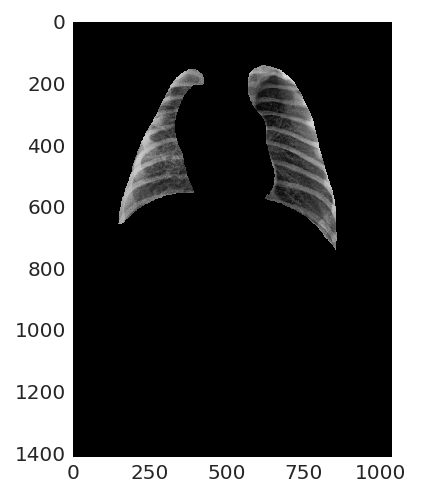

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1= cv2.imread(path+'/'+d1[0])
plt.imshow(img1)


In [9]:
data = pd.read_csv('/home/ncp/workspace/data/dataset_.csv',index_col=0)

In [11]:
data.head()

,identifier,sex,age_group,age,height,weight,report,pneumonia_type,orginal_dcm_file,orginal_png_file,crop_file,body_part_file,diagnosis
0,H05_00019_02,M,A1,0개월,NaN,0.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H05_00019_02.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
1,H01_00716_01,F,A1,0개월,52.0,3.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H01_00716_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
2,H03_00172_01,F,A1,0개월,42.0,1.8,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H03_00172_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
3,H05_00204_01,M,A1,0개월,50.5,3.0,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H05_00204_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
4,H04_00178_01,F,A1,0개월,30.0,0.5,Diffuse hazziness in both lungs. ETT insertion...,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H04_00178_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4


In [25]:
img_list = list(data['orginal_png_file'])
mask_list = list(data['body_part_file'])
crop_file = list(data['crop_file'])

In [29]:
def rv_3ch(og_img_path, mask_path, size):
    
    #module import
    import cv2
    
    # im_read
    og_img = cv2.imread(og_img_path)
    mask = cv2.imread(mask_path)
    
    # clahe
    clahe = cv2.createCLAHE(5.0,(12,12))
    
    ## og_img_convert
    cvt_img = cv2.resize(og_img, size)
    cvt_img = cv2.cvtColor(cvt_img,cv2.COLOR_BGR2GRAY)
    cvt_img = clahe.apply(cvt_img)  # 1 channel
    cvt_img = np.repeat(cvt_img[:,:,np.newaxis],3,-1)

    ## mask
    cvt_mask = cv2.resize(mask, size)
    cvt_mask = cv2.cvtColor(cvt_mask, cv2.COLOR_BGR2GRAY)

    ## remove
    remove = cv2.bitwise_and(cvt_img, cvt_img, mask = cvt_mask)
    
    return remove

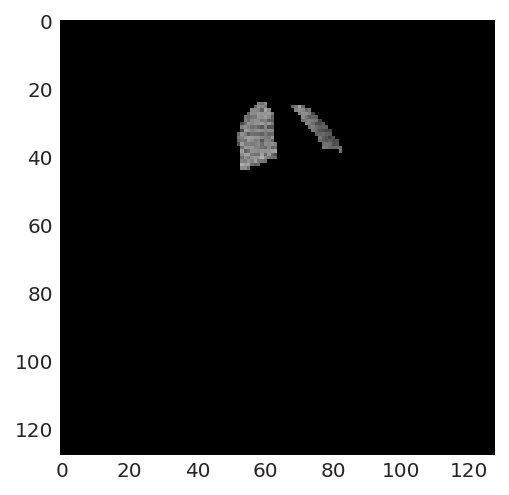

In [31]:
plt.imshow(rv_3ch(img_list[21], mask_list[21], (128,128)))

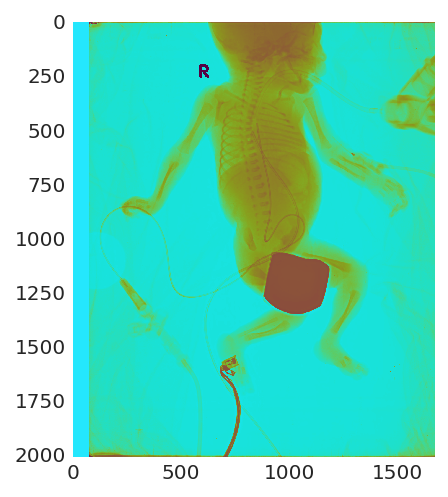

In [26]:
plt.imshow(cv2.imread(img_list[21]))

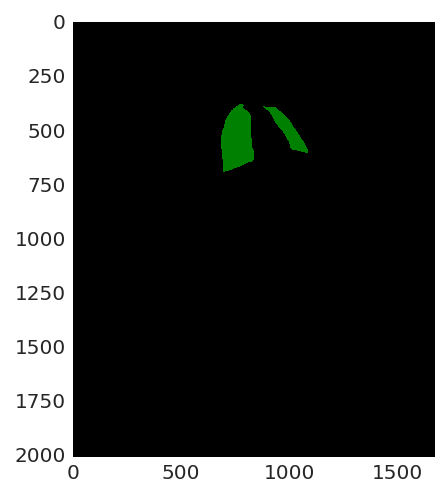

In [27]:
plt.imshow(cv2.imread(mask_list[21]))

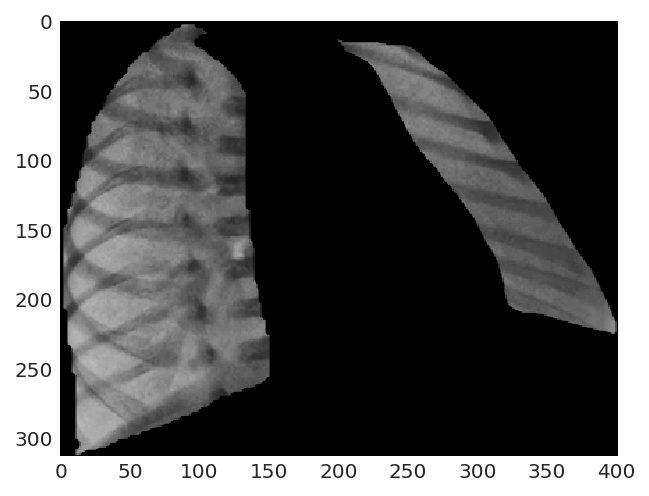

In [28]:
plt.imshow(cv2.imread(crop_file[21]))

In [5]:
# img1.shape

In [6]:
# height, width = img1.shape[:2]

In [7]:
img_gray  = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [8]:
_, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
# img_binary = cv2.bitwise_not(img_binary)

In [9]:
contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

In [233]:
# print(contours[0])  #왼
# print(contours[1])  #오

In [179]:
# for i, contour in enumerate(contours):
#     cv2.drawContours(img1, [contour],0,(0,255,0),2)
#     cv2.putText(img1, str(i), tuple(contour[0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,255,0),1)
#     print(hierarchy[0][i])
 
# x, y, w, h = cv2.boundingRect(contours[0])
# cv2.rectangle(img1,(x,y),(x+w, y+h),(0,0,255), 1) # red
 
# cv2.imshow('img1', img1)
# # cv2.waitKey()
# # cv2.destroyAllWindows()

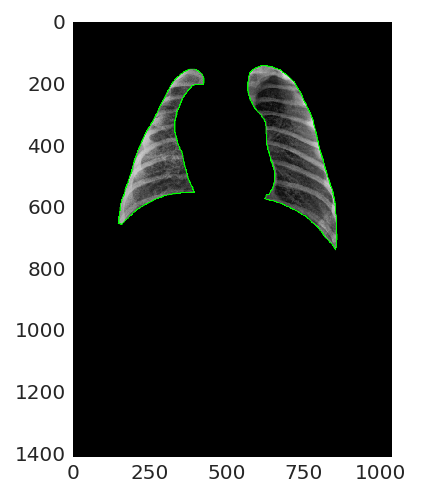

In [31]:
cv2.drawContours(image=img1, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
plt.imshow(img1)



In [181]:
# contours[i] -> contour
for i, contour in enumerate(contours):
#     cv2.drawContours(img1, [contour],0,None,2)    # (0,255,0) 초록색으로 안하고 걍 None 으로 줘서 투명색
#     cnt1 = contours[0]
#     cnt2 = contours[1]
#     cv2.drawContours(img_binary, [cnt1, cnt2], 0, None, 2)
    cv2.drawContours(image=img1, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)
    
#     cv2.putText(img1, str(i), tuple(contour[0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,255,0),1)
#     print(count, hierarchy[0][i])
    # cv2.imshow('src',img_src)
    # cv2.waitKey()

In [182]:
# num0 = 0 왼쪽
contours_min_0 = np.argmin(contours[0], axis=0)
contours_max_0 = np.argmax(contours[0], axis=0)

x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

# ---------------------------------------------------------
# num1= 1 오른쪽
contours_min_1 = np.argmin(contours[1], axis=0)
contours_max_1 = np.argmax(contours[1], axis=0)

x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
y_Max_1 = contours[1][contours_max_1[0][1]][0][1]

In [183]:
if y_Min_0 < y_Min_1:  # 왼쪽이 작으면 
    y_Min = y_Min_0    # 왼쪽이 min값 
else :
    y_Min = y_Min_1    #같거나 크면 오른쪽이 min값
    

if y_Max_0 > y_Max_1:  # 왼쪽이 크면 
    y_Max = y_Max_0    # 왼쪽이 max값 
else :
    y_Max = y_Max_1    #같거나 크면 오른쪽이 max값

In [184]:
print("x-Min =", x_Min_0)
print("y-Min =", y_Min)
print("x-Max =", x_Max_1)
print("y-Max =", y_Max)

x-Min = 146
y-Min = 141
x-Max = 855
y-Max = 739


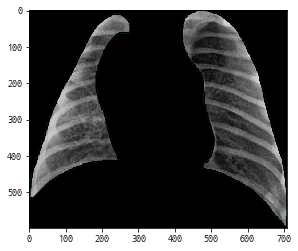

In [185]:
img_trim = img1[y_Min:y_Max, x_Min_0:x_Max_1]
plt.imshow(img_trim)


In [232]:
# print(len(contours))

In [44]:
# centres = []
# for i in range(len(contours)):
#     moments = cv2.moments(contours[i])
#     centres.append((int(moments['m10']/moments['m00']), int(moments['m01']/moments['m00'])))
#     cv2.circle(img1, centres[-1], 3, (0, 0, 0), -1)

# print(centres)

# plt.imshow(img1)
# cv2.imwrite('output.png',img)
# cv2.waitKey(0)

In [ ]:
# edged = cv2.Canny(img1, 10, 250)
# cv2.imshow('Edged', edged)
# cv2.waitKey(0)

In [7]:
def crop_error(path):
    img= cv2.imread(path)
    # gray scale
    img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # threshold
    _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
    # contour 잡기 (윤곽선은 투명)
    contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)


    # --------------------------------------------------------
    # contour[0]의 x,y min,max
    contours_min_0 = np.argmin(contours[0], axis=0)
    contours_max_0 = np.argmax(contours[0], axis=0)

    x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
    y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
    x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
    y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

    x_Max = int(x_Max_0+abs(x_Max_0-x_Min_0)*1.5)

    img_trim = img[y_Min_0:y_Max_0, x_Min_0:x_Max]
    
    return img_trim

In [119]:

#### 진 짜 코 드 

def crop(path):
    try: 
        img= cv2.imread(path)
        # gray scale
        img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # threshold
        _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)

        # --------------------------------------------------------
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        # contour[1]의 x,y min,max
        contours_min_1 = np.argmin(contours[1], axis=0)
        contours_max_1 = np.argmax(contours[1], axis=0)

        x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
        y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
        x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
        y_Max_1 = contours[1][contours_max_1[0][1]][0][1]

        # --------------------------------------------------------

        if x_Min_0 < x_Min_1:  # x_Min_0이 작으면 
            x_Min = x_Min_0    # x_Min_0이 min값 
        else :
            x_Min = x_Min_1    # 같거나 크면 x_Min_1 min값

        if x_Max_0 > x_Max_1:  # x_Max_0이 크면 
            x_Max = x_Max_0    # x_Max_0이 max값 
        else :
            x_Max = x_Max_1    #같거나 크면 x_Max_1이 max값

        if y_Min_0 < y_Min_1:  # y_Min_0이 작으면 
            y_Min = y_Min_0    # y_Min_0이 min값 
        else :
            y_Min = y_Min_1    #같거나 크면 y_Min_1이 min값


        if y_Max_0 > y_Max_1:  # y_Max_0이 크면 
            y_Max = y_Max_0    # y_Max_0이 max값 
        else :
            y_Max = y_Max_1    #같거나 크면 y_Max_1이 max값
        
#         sz= int((y_Max-y_Min)*0.2)
        y_Min= int(y_Min-100)
        y_Max= int(y_Max+100)
        x_Min= int(x_Min-100)
        x_Max= int(x_Max+100)
        
        img_trim = img[y_Min:y_Max, x_Min:x_Max]

        return img_trim
    #--------------------------------------------------------------------------------------------------------------------
    except Exception as e:
        img= cv2.imread(path)
        # gray scale
        img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # threshold
        _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)


        # --------------------------------------------------------
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        x_Max = int(x_Max_0+abs(x_Max_0-x_Min_0)*1.5)
        
#         sz= int((y_Max_0-y_Min_0)*0.2)
        y_Min= int(y_Min_0-10)
        y_Max= int(y_Max_0+10)
        x_Min= int(x_Min_0-10)
        x_Max= int(x_Max+10)

        img_trim = img[y_Min_0:y_Max_0, x_Min_0:x_Max]

        return img_trim

In [280]:

#### 진 짜 코 드  ##

def crop(path):
    try: 
        img= cv2.imread(path)
        # gray scale
        img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # threshold
        _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)

        # --------------------------------------------------------
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        # contour[1]의 x,y min,max
        contours_min_1 = np.argmin(contours[1], axis=0)
        contours_max_1 = np.argmax(contours[1], axis=0)

        x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
        y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
        x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
        y_Max_1 = contours[1][contours_max_1[0][1]][0][1]

        # --------------------------------------------------------

        if x_Min_0 < x_Min_1:  # x_Min_0이 작으면 
            x_Min = x_Min_0    # x_Min_0이 min값 
        else :
            x_Min = x_Min_1    # 같거나 크면 x_Min_1 min값

        if x_Max_0 > x_Max_1:  # x_Max_0이 크면 
            x_Max = x_Max_0    # x_Max_0이 max값 
        else :
            x_Max = x_Max_1    #같거나 크면 x_Max_1이 max값

        if y_Min_0 < y_Min_1:  # y_Min_0이 작으면 
            y_Min = y_Min_0    # y_Min_0이 min값 
        else :
            y_Min = y_Min_1    #같거나 크면 y_Min_1이 min값


        if y_Max_0 > y_Max_1:  # y_Max_0이 크면 
            y_Max = y_Max_0    # y_Max_0이 max값 
        else :
            y_Max = y_Max_1    #같거나 크면 y_Max_1이 max값
        
#         sz= int((y_Max-y_Min)*0.2)
        y_Min= int(y_Min-100)
        y_Max= int(y_Max+100)
        x_Min= int(x_Min-100)
        x_Max= int(x_Max+100)
                
        if x_Min < 0 :
            img_trim =  img[y_Min:y_Max, : x_Max ]
        elif y_Min < 0 :    
            img_trim = img[ :y_Max, x_Min:x_Max]
        elif x_Min < 0  and y_Min < 0 :
            img_trim = img[:y_Max,:x_Max]
        else:
            img_trim = img[y_Min : y_Max, x_Min : x_Max]

        return img_trim
    #--------------------------------------------------------------------------------------------------------------------
    except Exception as e:
        img= cv2.imread(path)
        # gray scale
        img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # threshold
        _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)


        # --------------------------------------------------------
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        x_Max = int(x_Max_0+abs(x_Max_0-x_Min_0)*1.5)
        
#         sz= int((y_Max_0-y_Min_0)*0.2)
        y_Min= int(y_Min_0-10)
        y_Max= int(y_Max_0+10)
        x_Min= int(x_Min_0-10)
        x_Max= int(x_Max+10)
        
        if x_Min < 0 :
            img_trim =  img[y_Min:y_Max, : x_Max ]
        elif y_Min < 0 :    
            img_trim = img[ :y_Max, x_Min:x_Max]
        elif x_Min < 0 and y_Min < 0 :
            img_trim = img[:y_Max,:x_Max]
        else:
            img_trim = img[y_Min : y_Max, x_Min : x_Max]

#         img_trim = img[y_Min_0:y_Max_0, x_Min_0:x_Max]

        return img_trim

In [357]:
path = '/home/ncp/workspace/data/crop/d6/H13_01393_02.png'

In [1]:
def Khcode(path):
    #### 진 짜 코 드  ##
    img= cv2.imread(path)
    # gray scale
    img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # threshold
    _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
    # contour 잡기 (윤곽선은 투명)
    contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)

    try:

        # --------------------------------------------------------
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        # contour[1]의 x,y min,max
        contours_min_1 = np.argmin(contours[1], axis=0)
        contours_max_1 = np.argmax(contours[1], axis=0)

        x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
        y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
        x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
        y_Max_1 = contours[1][contours_max_1[0][1]][0][1]

        # --------------------------------------------------------

        if x_Min_0 < x_Min_1:  # x_Min_0이 작으면 
            x_Min = x_Min_0    # x_Min_0이 min값 
        else :
            x_Min = x_Min_1    # 같거나 크면 x_Min_1 min값

        if x_Max_0 > x_Max_1:  # x_Max_0이 크면 
            x_Max = x_Max_0    # x_Max_0이 max값 
        else :
            x_Max = x_Max_1    #같거나 크면 x_Max_1이 max값

        if y_Min_0 < y_Min_1:  # y_Min_0이 작으면 
            y_Min = y_Min_0    # y_Min_0이 min값 
        else :
            y_Min = y_Min_1    #같거나 크면 y_Min_1이 min값


        if y_Max_0 > y_Max_1:  # y_Max_0이 크면 
            y_Max = y_Max_0    # y_Max_0이 max값 
        else :
            y_Max = y_Max_1    #같거나 크면 y_Max_1이 max값

        #         sz= int((y_Max-y_Min)*0.2)
        y_Min= int(y_Min-100)
        y_Max= int(y_Max+100)
        x_Min= int(x_Min-100)
        x_Max= int(x_Max+100)

        if x_Min < 0 and y_Min > 0 :
            img_trim =  img[y_Min:y_Max, : x_Max ]
        elif y_Min < 0 and x_Min > 0 :    
            img_trim = img[ :y_Max, x_Min:x_Max]
        elif x_Min < 0  and y_Min < 0 :
            img_trim = img[:y_Max,:x_Max]
        else:
            img_trim = img[y_Min : y_Max, x_Min : x_Max]
        
        return img_trim

    #--------------------------------------------------------------------------------------------------------------------
    except Exception as e:
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        x_Max = int(x_Max_0+abs(x_Max_0-x_Min_0)*1.5)

        #         sz= int((y_Max_0-y_Min_0)*0.2)
        y_Min= int(y_Min_0-10)
        y_Max= int(y_Max_0+10)
        x_Min= int(x_Min_0-10)
        x_Max= int(x_Max+10)

        if x_Min < 0 and y_Min > 0 :
            img_trim =  img[y_Min:y_Max, x_Min+10 : x_Max ]
        elif y_Min < 0 and x_Min > 0 :    
            img_trim = img[ y_Min+10:y_Max, x_Min:x_Max]
        elif x_Min < 0  and y_Min < 0 :
            img_trim = img[:y_Max,:x_Max]
        else:
            img_trim = img[y_Min : y_Max, x_Min : x_Max]


        return img_trim 

이게되네
이게되네
이게되네
이게되네
이게되네
이게되네
이게되네
이게되네
이게되네
이게되네
이게되네
이게되네
이게되네


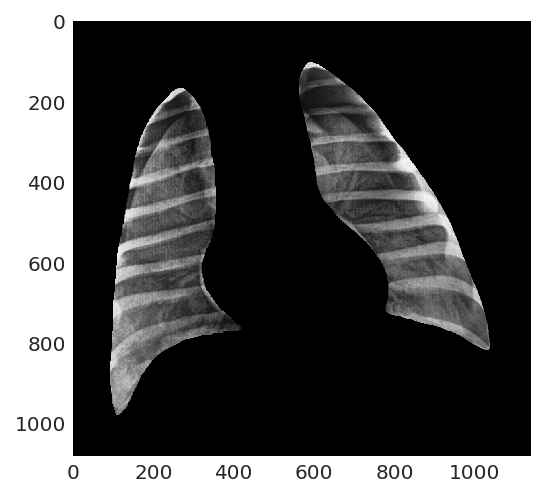

In [388]:
good = []
no = []

for err in error:
    try:
        A = Khcode(err)
        print('이게되네')
        good.append(err)
        plt.imshow(A)
    except Exception as e:
        print('안되네')
        no.append(err)
        
    

In [2]:
# image_path
import os

d1p = '/home/ncp/workspace/data/DL/d1/'
d2p = '/home/ncp/workspace/data/DL/d2/'
d3p = '/home/ncp/workspace/data/DL/d3/'
d4p = '/home/ncp/workspace/data/DL/d4/'
d5p = '/home/ncp/workspace/data/DL/d5/'
d6p = '/home/ncp/workspace/data/DL/d6/'
d0p = '/home/ncp/workspace/data/DL/d0/'

f1 = os.listdir('/home/ncp/workspace/data/DL/d1')
f2 = os.listdir('/home/ncp/workspace/data/DL/d2')
f3 = os.listdir('/home/ncp/workspace/data/DL/d3')
f4 = os.listdir('/home/ncp/workspace/data/DL/d4')
f5 = os.listdir('/home/ncp/workspace/data/DL/d5')
f6 = os.listdir('/home/ncp/workspace/data/DL/d6')
f0 = os.listdir('/home/ncp/workspace/data/DL/d0')

folders = [f1,f2,f3,f4,f5,f6,f0]
fdpath = '/home/ncp/workspace/data/DL/'

img_f1 = []
for name in f1:
    img_f1.append(d1p+name)
    
img_f2 = []
for name in f2:
    img_f2.append(d2p+name)
    
img_f3 = []
for name in f3:
    img_f3.append(d3p+name)
    
img_f4 = []
for name in f4:
    img_f4.append(d4p+name)
    
img_f5 = []
for name in f5:
    img_f5.append(d5p+name)
    
img_f6 = []
for name in f6:
    img_f6.append(d6p+name)
    
img_f0 = []
for name in f0:
    img_f0.append(d0p+name)
    
# print(len(img_f1+img_f2+img_f3+img_f4+img_f5+img_f6+img_f0))
folders = [img_f1,img_f2,img_f3,img_f4,img_f5,img_f6,img_f0]
# len(f1 + f2 + f3 + f4 + f5 + f6 + f0) # f1 -ch f4 // check point rmdir

In [15]:
# ### 진 짜 코 드 저 장 
# import cv2 
# import numpy as np 
# import matplotlib.pyplot as plt

# complete = []
# error = []


# for folder in folders:
#     for  img_path in folder:
#         try:
#             if 'd1' in img_path:
#                 fdname = 'd1'
#             elif 'd2' in img_path:
#                 fdname = 'd2'
#             elif 'd3' in img_path:
#                 fdname = 'd3'
#             elif 'd4' in img_path:
#                 fdname = 'd4'
#             elif 'd5' in img_path:
#                 fdname = 'd5'
#             elif 'd6' in img_path:
#                 fdname = 'd6'
#             elif 'd0' in img_path:
#                 fdname = 'd0'

#             save_fname = img_path.split('DL/')[0]+'crop_2/'+fdname+img_path.split(fdname)[1]
#             cropimg = Khcode(img_path)

#             plt.imsave(save_fname,cropimg)
#             print('[원]',img_path,'        [저장]',save_fname,'        [완료]')
#             complete.append(fdname)

#         except Exception as e:
#             pass
#             print('\n',e)
#             print(img_path,'      [오류]')
#             error.append(img_path)

In [4]:
# a = crop('/home/ncp/workspace/data/DL/d1/H03_00488_01.png')
# plt.imshow(a)

In [5]:
# plt.imshow(crop('/home/ncp/workspace/data/DL/d4/H03_00329_01.png'))

In [117]:
# plt.imshow(crop('/home/ncp/workspace/data/DL/d4/H03_00329_01.png'))
# plt.show()
# plt.imshow(crop('/home/ncp/workspace/data/DL/d1/H05_00835_02.png'))
# plt.show()

# plt.imshow(crop('/home/ncp/workspace/data/DL/d1/H05_00799_01.png'))
# plt.show()

# plt.imshow(crop('/home/ncp/workspace/data/DL/d1/H03_00488_01.png'))
# plt.show()


# 함수다시

In [9]:

#### 진 짜 코 드 

def crop(org_path,bt_img_path):
    try: 
        img= cv2.imread(org_path)
        btimg= cv2.imread(bt_img_path)
        # gray scale
        btimg_gray  = cv2.cvtColor(btimg, cv2.COLOR_BGR2GRAY)
        # threshold
        _, bi_binary  = cv2.threshold(btimg_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(bi_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
#         cv2.drawContours(image=mask, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)

        # --------------------------------------------------------
        # contour[i]의 x,y min,max
        x_Min_list = []
        y_Min_list = []
        x_Max_list = []
        y_Max_list = []

        for i in range(len(contours)):
            stri = str(i)

            globals()['contours_min_{}'.format(i)] = np.argmin(contours[i], axis=0)
            globals()['contours_max_{}'.format(i)] = np.argmax(contours[i], axis=0)

            xmn= contours[i][globals()['contours_min_{}'.format(i)][0][0]][0][0]
            ymn= contours[i][globals()['contours_min_{}'.format(i)][0][1]][0][1]
            xmx= contours[i][globals()['contours_max_{}'.format(i)][0][0]][0][0]
            ymx= contours[i][globals()['contours_max_{}'.format(i)][0][1]][0][1]

            x_Min_list.append(xmn)
            y_Min_list.append(ymn)
            x_Max_list.append(xmx)
            y_Max_list.append(ymx)

            x_Min = x_min_0
            y_Min = y_min_0
            x_Max = x_max_0
            y_Max = y_max_0

            for a in x_Min_list:
                if x_Min <a:
                    x_Min = x_Min
                else:
                    x_Min = a

            for b in y_Min_list:
                if y_Min <b:
                    y_Min = y_Min
                else:
                    y_Min = b

            for c in x_Max_list:
                if x_Max >c:
                    x_Max = x_Max
                else:
                    x_Max = c

            for d in y_Max_list:
                if y_Max >d:
                    y_Max = y_Max
                else:
                    y_Max = d

                
                
#         sz= int((y_Max-y_Min)*0.2)
        y_Min= int(y_Min-100)
        y_Max= int(y_Max+100)
        x_Min= int(x_Min-100)
        x_Max= int(x_Max+100)
        
        img_trim = img[y_Min:y_Max, x_Min:x_Max]

        return img_trim
    #--------------------------------------------------------------------------------------------------------------------
    except Exception as e:
        img= cv2.imread(org_path)
        btimg= cv2.imread(bt_img_path)
        # gray scale
        btimg_gray  = cv2.cvtColor(btimg, cv2.COLOR_BGR2GRAY)
        # threshold
        _, bi_binary  = cv2.threshold(btimg_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(bi_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
#         cv2.drawContours(image=mask, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)


        # --------------------------------------------------------
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        x_Max = int(x_Max_0+abs(x_Max_0-x_Min_0)*1.5)
        
#         sz= int((y_Max_0-y_Min_0)*0.2)
        y_Min= int(y_Min_0-10)
        y_Max= int(y_Max_0+10)
        x_Min= int(x_Min_0-10)
        x_Max= int(x_Max+10)

        img_trim = img[y_Min_0:y_Max_0, x_Min_0:x_Max]

        return img_trim

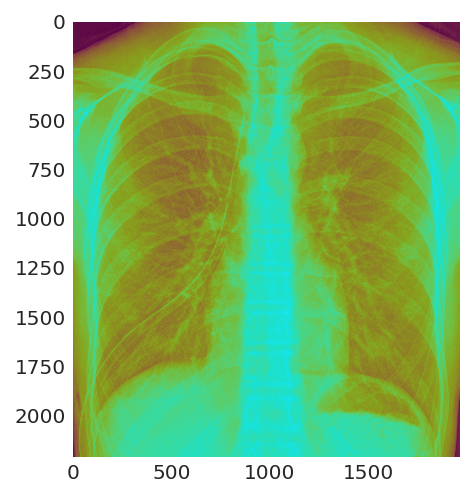

In [118]:
plt.imshow(crop(ip,bip))

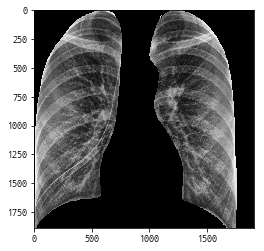

In [12]:
import numpy as np
plt.imshow(crop(bip,bip))

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

bip= '/home/ncp/workspace/data/DL/d1/H01_01830_01.png'
mp= '/home/ncp/workspace/data/train/01.공기누출/A4.11-15세/H01_01830_01/mask/H01_01830_01_1.png'
ip= '/home/ncp/workspace/data/train/01.공기누출/A4.11-15세/H01_01830_01/org/H01_01830_01.png'

btimg= cv2.imread(bip)
img= cv2.imread(ip)
mask= cv2.imread(mp)

# # gray scale
# mask_gray  = cv2.cvtColor(btimg, cv2.COLOR_BGR2GRAY)
# # threshold
# _, mask_binary  = cv2.threshold(mask_gray, 0, 255, cv2.THRESH_BINARY)
# # contour 잡기 (윤곽선은 투명)
# contours, hierarchy = cv2.findContours(mask_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
# cv2.drawContours(image=btimg, contours=contours, contourIdx=-3, color=None, thickness=5, lineType=cv2.LINE_AA)

# plt.imshow(btimg)
# plt.show()

# # len(contours)

In [11]:
btimg= cv2.imread(bip)
img= cv2.imread(ip)
mask= cv2.imread(mp)

# gray scale
mask_gray  = cv2.cvtColor(btimg, cv2.COLOR_BGR2GRAY)
# threshold
_, mask_binary  = cv2.threshold(mask_gray, 0, 255, cv2.THRESH_BINARY)
# contour 잡기 (윤곽선은 투명)
contours, hierarchy = cv2.findContours(mask_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)


contours_min_1 = np.argmin(contours[1], axis=0)
contours_max_1 = np.argmax(contours[1], axis=0)

print(contours_min_1)
a= contours[1][contours_min_1[0][0]]
print(a)
#     globals()['x_min_{}'.format(i)] = contours[i][globals()['contours_min_{}'.format(i)][0][0]][0][0]
#     globals()['y_min_{}'.format(i)] = contours[i][globals()['contours_min_{}'.format(i)][0][1]][0][1]
#     globals()['x_max_{}'.format(i)] = contours[i][globals()['contours_max_{}'.format(i)][0][0]][0][0]
#     globals()['y_max_{}'.format(i)] = contours[i][globals()['contours_max_{}'.format(i)][0][1]][0][1]    

# xmn= contours[i][globals()['contours_min_{}'.format(i)][0][0]][0][0] # X min값 
# ymn= contours[i][globals()['contours_min_{}'.format(i)][0][1]][0][1] # y min값 
# xmx= contours[i][globals()['contours_max_{}'.format(i)][0][0]][0][0] # X max값
# ymx= contours[i][globals()['contours_max_{}'.format(i)][0][1]][0][1] # y max값

[[492   0]]
[[1586  545]]


In [9]:
btimg= cv2.imread(bip)
img= cv2.imread(ip)
mask= cv2.imread(mp)

# gray scale
mask_gray  = cv2.cvtColor(btimg, cv2.COLOR_BGR2GRAY)
# threshold
_, mask_binary  = cv2.threshold(mask_gray, 0, 255, cv2.THRESH_BINARY)
# contour 잡기 (윤곽선은 투명)
contours, hierarchy = cv2.findContours(mask_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)

# --------------------------------------------------------
# contour[i]의 x,y min,max

x_Min_list = []
y_Min_list = []
x_Max_list = []
y_Max_list = []


# if len(contours)>=2:
    
    
for i in range(len(contours)):
    stri = str(i)
    
    globals()['contours_min_{}'.format(i)] = np.argmin(contours[i], axis=0) # i번째 컨투어의 min값 위치
    globals()['contours_max_{}'.format(i)] = np.argmax(contours[i], axis=0) # max값 위치

#     globals()['x_min_{}'.format(i)] = contours[i][globals()['contours_min_{}'.format(i)][0][0]][0][0]
#     globals()['y_min_{}'.format(i)] = contours[i][globals()['contours_min_{}'.format(i)][0][1]][0][1]
#     globals()['x_max_{}'.format(i)] = contours[i][globals()['contours_max_{}'.format(i)][0][0]][0][0]
#     globals()['y_max_{}'.format(i)] = contours[i][globals()['contours_max_{}'.format(i)][0][1]][0][1]    
    
    xmn= contours[i][globals()['contours_min_{}'.format(i)][0][0]][0][0] # X min값 
    ymn= contours[i][globals()['contours_min_{}'.format(i)][0][1]][0][1] # y min값 
    xmx= contours[i][globals()['contours_max_{}'.format(i)][0][0]][0][0] # X max값
    ymx= contours[i][globals()['contours_max_{}'.format(i)][0][1]][0][1] # y max값
    
    x_Min_list.append(xmn)
    y_Min_list.append(ymn)
    x_Max_list.append(xmx)
    y_Max_list.append(ymx)
    
    x_Min = x_min_0
    y_Min = y_min_0
    x_Max = x_max_0
    y_Max = y_max_0
    
    for a in x_Min_list:
        if x_Min <a:
            x_Min = x_Min
        else:
            x_Min = a
    
    for b in y_Min_list:
        if y_Min <b:
            y_Min = y_Min
        else:
            y_Min = b
            
    for c in x_Max_list:
        if x_Max <c:
            x_Max = x_Max
        else:
            x_Max = c
            
    for d in y_Max_list:
        if y_Max <d:
            y_Max = y_Max
        else:
            y_Max = d


    
#     if x_Min < ['x_min_{}'.format(i)]:
#         x_Min= x_Min
#     else :
#         x_Min= ['x_min_{}'.format(i)]

#     if y_Min < ['y_min_{}'.format(i)]:
#         y_Min= y_Min
#     else :
#         y_Min= 'y_min_{}'.format(i)

#     if x_Max > ['x_max_{}'.format(i)]:
#         x_Max= x_Max
#     else :
#         x_Max= ['x_max_{}'.format(i)]

#     if y_Max > ['y_max_{}'.format(i)]:
#         y_Max= y_Max
#     else :
#         y_Max= ['y_max_{}'.format(i)]


print(x_Min)
print(x_Max)
print(y_Min)
print(y_Max)

# #         sz= int((y_Max-y_Min)*0.2)
# y_Min= int(y_Min-100)
# y_Max= int(y_Max+100)
# x_Min= int(x_Min-100)dd
# x_Max= int(x_Max+100)

# img_trim = img[y_Min:y_Max, x_Min:x_Max]

# return img_trim
# #--------------------------------------------------------------------------------------------------------------

IndexError: index 1 is out of bounds for axis 0 with size 1

In [160]:
path= '/home/ncp/workspace/data/DL/d6/'

a=os.listdir(path)
len(a)

484

In [161]:
path2= '/home/ncp/workspace/data/crop_2/d6/'

b=os.listdir(path2)
len(b)

477

In [162]:
for i in range(len(a)):
    if a[i] in b:
        pass
    else:
        print(a[i])


H05_02284_01.png
H04_01266_01.png
H02_01136_01.png
H02_01137_01.png
H13_01703_01.png
H01_01036_01.png
H13_01393_02.png


In [195]:
d1p = '/home/ncp/workspace/data/DL/d1/'
d2p = '/home/ncp/workspace/data/DL/d2/'
d3p = '/home/ncp/workspace/data/DL/d3/'
d4p = '/home/ncp/workspace/data/DL/d4/'
d5p = '/home/ncp/workspace/data/DL/d5/'
d6p = '/home/ncp/workspace/data/DL/d6/'
d0p = '/home/ncp/workspace/data/DL/d0/'

f1 = os.listdir('/home/ncp/workspace/data/DL/d1')
f2 = os.listdir('/home/ncp/workspace/data/DL/d2')
f3 = os.listdir('/home/ncp/workspace/data/DL/d3')
f4 = os.listdir('/home/ncp/workspace/data/DL/d4')
f5 = os.listdir('/home/ncp/workspace/data/DL/d5')
f6 = os.listdir('/home/ncp/workspace/data/DL/d6')
f0 = os.listdir('/home/ncp/workspace/data/DL/d0')

folders = [f1,f2,f3,f4,f5,f6,f0]

len(f1 + f2 + f3 + f4 + f5 + f6 + f0) # f1 -ch f4 // check point rmdir


4002

In [163]:
# os.remove('/home/ncp/workspace/data/crop_2/d6/H02_01137_01.png')

In [220]:
# image_path
d1p = '/home/ncp/workspace/data/crop/d1/'
d2p = '/home/ncp/workspace/data/crop/d2/'
d3p = '/home/ncp/workspace/data/crop/d3/'
d4p = '/home/ncp/workspace/data/crop/d4/'
d5p = '/home/ncp/workspace/data/crop/d5/'
d6p = '/home/ncp/workspace/data/crop/d6/'
d0p = '/home/ncp/workspace/data/crop/d0/'

f1 = os.listdir('/home/ncp/workspace/data/crop/d1')
f2 = os.listdir('/home/ncp/workspace/data/crop/d2')
f3 = os.listdir('/home/ncp/workspace/data/crop/d3')
f4 = os.listdir('/home/ncp/workspace/data/crop/d4')
f5 = os.listdir('/home/ncp/workspace/data/crop/d5')
f6 = os.listdir('/home/ncp/workspace/data/crop/d6')
f0 = os.listdir('/home/ncp/workspace/data/crop/d0')

folders = [f1,f2,f3,f4,f5,f6,f0]
fdpath = '/home/ncp/workspace/data/DL/'

In [221]:
len(f1 + f2 + f3 + f4 + f5 + f6 + f0) # f1 -ch f4 // check point rmdir
# print(len(f1))

4001

In [199]:
4002-3863

139

In [222]:
lung_only_one_path= []
bt_img_paths= []
error= []

for a in f1:
    bt_img_paths.append(d1p+a)
for a in f2:
    bt_img_paths.append(d2p+a)
for a in f3:
    bt_img_paths.append(d3p+a)
for a in f4:
    bt_img_paths.append(d4p+a)
for a in f5:
    bt_img_paths.append(d5p+a)
for a in f6:
    bt_img_paths.append(d6p+a)
for a in f0:
    bt_img_paths.append(d0p+a)

for img_path in bt_img_paths:
    try:
        btimg= cv2.imread(img_path)
        # gray scale
        btimg_gray  = cv2.cvtColor(btimg, cv2.COLOR_BGR2GRAY)
        # threshold
        _, bi_binary  = cv2.threshold(btimg_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(bi_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

        if len(contours)<2:
            lung_only_one_path.append(img_path)
        else:
            pass
    except Exception as e:
            print(e)
            print(img_path,'      [오류]')
            error.append(img_path)

OpenCV(4.5.4) /tmp/pip-req-build-w88qv8vs/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/home/ncp/workspace/data/crop/d5/.ipynb_checkpoints       [오류]
OpenCV(4.5.4) /tmp/pip-req-build-w88qv8vs/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/home/ncp/workspace/data/crop/d0/.ipynb_checkpoints       [오류]


In [224]:
len(bt_img_paths)
bt_img_paths[0]

'/home/ncp/workspace/data/crop/d1/H05_00835_02.png'

In [225]:
len(lung_only_one_path)

145

In [229]:
# lung_only_one_path

In [233]:
# error_lung=[]
error_lung_fromcrop=[]

for a in lung_only_one_path:
    for i in range(7):
        try:
            patient = a.split('crop/'+'d'+str(i)+'/')[1]
            error_lung_fromcrop.append(patient)
        except: pass

In [234]:
len(error_lung_fromcrop)
# error_lung

145

In [253]:
# error_lung_fromcrop

In [242]:
lung_error_crop2=[]
path_here= '/home/ncp/workspace/data/crop_2'
for a in lung_only_one_path:
    b= a.split('crop')[1]
    b= lung_error_crop2.append(path_here+b)

# lung_error_crop2

In [243]:
for lung_1_img in lung_error_crop2:
    try:
        os.remove(lung_1_img)
    except:
        pass

In [245]:
# image_path
d1p = '/home/ncp/workspace/data/crop_2/d1/'
d2p = '/home/ncp/workspace/data/crop_2/d2/'
d3p = '/home/ncp/workspace/data/crop_2/d3/'
d4p = '/home/ncp/workspace/data/crop_2/d4/'
d5p = '/home/ncp/workspace/data/crop_2/d5/'
d6p = '/home/ncp/workspace/data/crop_2/d6/'
d0p = '/home/ncp/workspace/data/crop_2/d0/'

f1 = os.listdir('/home/ncp/workspace/data/crop_2/d1')
f2 = os.listdir('/home/ncp/workspace/data/crop_2/d2')
f3 = os.listdir('/home/ncp/workspace/data/crop_2/d3')
f4 = os.listdir('/home/ncp/workspace/data/crop_2/d4')
f5 = os.listdir('/home/ncp/workspace/data/crop_2/d5')
f6 = os.listdir('/home/ncp/workspace/data/crop_2/d6')
f0 = os.listdir('/home/ncp/workspace/data/crop_2/d0')

folders = [f1,f2,f3,f4,f5,f6,f0]
len(f1 + f2 + f3 + f4 + f5 + f6 + f0) # f1 -ch f4 // check point rmdir


3856

In [236]:
# for img_path in lung_only_one_path:
#     img= cv2.imread(img_path)
#     plt.imshow(img)
#     plt.show()

# -----------------------------------------------------------


In [3]:

#### 진 짜 코 드 

def crop(org_path,bt_img_path):
    try: 
        img= cv2.imread(org_path)
        btimg= cv2.imread(bt_img_path)
        # gray scale
        btimg_gray  = cv2.cvtColor(btimg, cv2.COLOR_BGR2GRAY)
        # threshold
        _, bi_binary  = cv2.threshold(btimg_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(bi_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
#         cv2.drawContours(image=mask, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)

        # --------------------------------------------------------
        # contour[i]의 x,y min,max
        x_Min_list = []
        y_Min_list = []
        x_Max_list = []
        y_Max_list = []

        for i in range(len(contours)):
            stri = str(i)

            globals()['contours_min_{}'.format(i)] = np.argmin(contours[i], axis=0)
            globals()['contours_max_{}'.format(i)] = np.argmax(contours[i], axis=0)

            xmn= contours[i][globals()['contours_min_{}'.format(i)][0][0]][0][0]
            ymn= contours[i][globals()['contours_min_{}'.format(i)][0][1]][0][1]
            xmx= contours[i][globals()['contours_max_{}'.format(i)][0][0]][0][0]
            ymx= contours[i][globals()['contours_max_{}'.format(i)][0][1]][0][1]

            x_Min_list.append(xmn)
            y_Min_list.append(ymn)
            x_Max_list.append(xmx)
            y_Max_list.append(ymx)

            x_Min = x_min_0
            y_Min = y_min_0
            x_Max = x_max_0
            y_Max = y_max_0

            for a in x_Min_list:
                if x_Min <a:
                    x_Min = x_Min
                else:
                    x_Min = a

            for b in y_Min_list:
                if y_Min <b:
                    y_Min = y_Min
                else:
                    y_Min = b

            for c in x_Max_list:
                if x_Max >c:
                    x_Max = x_Max
                else:
                    x_Max = c

            for d in y_Max_list:
                if y_Max >d:
                    y_Max = y_Max
                else:
                    y_Max = d

                
                
#         sz= int((y_Max-y_Min)*0.2)
        y_Min= int(y_Min-100)
        y_Max= int(y_Max+100)
        x_Min= int(x_Min-100)
        x_Max= int(x_Max+100)
        
        img_trim = img[y_Min:y_Max, x_Min:x_Max]

        return img_trim
    #--------------------------------------------------------------------------------------------------------------------
    except Exception as e:
        img= cv2.imread(org_path)
        btimg= cv2.imread(bt_img_path)
        # gray scale
        btimg_gray  = cv2.cvtColor(btimg, cv2.COLOR_BGR2GRAY)
        # threshold
        _, bi_binary  = cv2.threshold(btimg_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(bi_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
#         cv2.drawContours(image=mask, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)


        # --------------------------------------------------------
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        x_Max = int(x_Max_0+abs(x_Max_0-x_Min_0)*1.5)
        
#         sz= int((y_Max_0-y_Min_0)*0.2)
        y_Min= int(y_Min_0-10)
        y_Max= int(y_Max_0+10)
        x_Min= int(x_Min_0-10)
        x_Max= int(x_Max+10)

        img_trim = img[y_Min_0:y_Max_0, x_Min_0:x_Max]

        return img_trim

In [5]:
data = pd.read_csv('/home/ncp/workspace/data/dataset_.csv')
data

,Unnamed: 0,identifier,sex,age_group,age,height,weight,report,pneumonia_type,orginal_dcm_file,orginal_png_file,crop_file,body_part_file,diagnosis
0,0,H05_00019_02,M,A1,0개월,NaN,0.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H05_00019_02.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
1,1,H01_00716_01,F,A1,0개월,52.0,3.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H01_00716_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
2,2,H03_00172_01,F,A1,0개월,42.0,1.8,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H03_00172_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
3,3,H05_00204_01,M,A1,0개월,50.5,3.0,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H05_00204_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
4,4,H04_00178_01,F,A1,0개월,30.0,0.5,Diffuse hazziness in both lungs. ETT insertion...,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H04_00178_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
5,5,H04_00208_01,M,A1,0개월,30.5,0.6,ETT insertion state.\nUVC and UAC insertion st...,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H04_00208_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
6,6,H07_02617_01,F,A1,0개월,39.0,1.1,Area of bilateral ground glass lungs with air-...,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H07_02617_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
7,7,H03_00329_01,F,A1,0개월,37.0,0.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H03_00329_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
8,8,H03_00130_01,M,A1,0개월,40.0,1.4,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H03_00130_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
9,9,H08_00179_01,M,A1,0개월,53.0,3.1,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H08_00179_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4


In [ ]:
f1 = os.listdir('/home/ncp/workspace/data/crop_2/d1')
f2 = os.listdir('/home/ncp/workspace/data/crop_2/d2')
f3 = os.listdir('/home/ncp/workspace/data/crop_2/d3')
f4 = os.listdir('/home/ncp/workspace/data/crop_2/d4')
f5 = os.listdir('/home/ncp/workspace/data/crop_2/d5')
f6 = os.listdir('/home/ncp/workspace/data/crop_2/d6')
f0 = os.listdir('/home/ncp/workspace/data/crop_2/d0')